np.vstack()
对于一个array的合并，我们可以想到按行、按列等多种方式进行合并。

In [1]:
import numpy as np
import pandas as pd

A = np.array([1,1,1])
B = np.array([2,2,2])

print(np.vstack((A,B)))    # vertical stack
"""
[[1,1,1]
 [2,2,2]]
"""

[[1 1 1]
 [2 2 2]]


'\n[[1,1,1]\n [2,2,2]]\n'

vertical stack本身属于一种上下合并，即对括号中的两个整体进行对应操作。

In [2]:
C = np.vstack((A,B))
print(A.shape,C.shape)

# (3,) (2,3)


(3,) (2, 3)


np.hstack()




介绍完了上下合并，我们来说说左右合并：

In [3]:
D = np.hstack((A,B))       # horizontal stack

print(D)
# [1,1,1,2,2,2]

print(A.shape,D.shape)
# (3,) (6,)

[1 1 1 2 2 2]
(3,) (6,)


D本身来源于A，B两个数列的左右合并，而且新生成的D本身也是一个含有6项元素的序列。

同时我们也可以通过axis参数很好的控制了矩阵的纵向或是横向打印，相比较vstack和hstack函数显得更加方便。

数据分割

In [8]:
A = np.arange(12).reshape((3, 4))
print(A)
"""
array([[ 0,  1,  2,  3],
    [ 4,  5,  6,  7],
    [ 8,  9, 10, 11]])
"""

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


'\narray([[ 0,  1,  2,  3],\n    [ 4,  5,  6,  7],\n    [ 8,  9, 10, 11]])\n'

纵向分割

In [9]:
print(np.split(A, 2, axis=1))
"""
[array([[0, 1],
        [4, 5],
        [8, 9]]), array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]
"""

[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11]])]


'\n[array([[0, 1],\n        [4, 5],\n        [8, 9]]), array([[ 2,  3],\n        [ 6,  7],\n        [10, 11]])]\n'

横向分割

In [10]:
print(np.split(A, 3, axis=0))

# [array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]


[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]


不等量的分割

机器学习时经常会需要将数据做不等量的分割，比如将数据分为训练集和测试集，或者将数据分为训练集、验证集和测试集。

In [11]:
print(np.array_split(A, 3, axis=1))
"""
[array([[0, 1],
        [4, 5],
        [8, 9]]), array([[ 2],
        [ 6],
        [10]]), array([[ 3],
        [ 7],
        [11]])]
"""

[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2],
       [ 6],
       [10]]), array([[ 3],
       [ 7],
       [11]])]


'\n[array([[0, 1],\n        [4, 5],\n        [8, 9]]), array([[ 2],\n        [ 6],\n        [10]]), array([[ 3],\n        [ 7],\n        [11]])]\n'

In [12]:
print(np.vsplit(A, 3)) #等于 print(np.split(A, 3, axis=0))

# [array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]


print(np.hsplit(A, 2)) #等于 print(np.split(A, 2, axis=1))
"""
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]
"""

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11]])]


'\n[array([[0, 1],\n       [4, 5],\n       [8, 9]]), array([[ 2,  3],\n        [ 6,  7],\n        [10, 11]])]\n'

numpy综合案例

In [13]:
with open('covid19_day_wise.csv', "r", encoding="utf-8") as f:
    data = f.readlines()
    covid = {
        "date": [],
        "data": [],
        "header": [h for h in data[0].strip().split(",")[1:]]
    }
for row in data[1:]:
    split_row = row.strip().split(",")
    covid["date"].append(split_row[0])
    covid["data"].append([float(n) for n in split_row[1:]])  # 将字符串转换为浮点数

获取 2020 年 2 月 3 日的所有数据

In [14]:
print("日期列表摘取：", covid["date"][:4])

date_idx = covid["date"].index("2020-02-03")
print("日期->索引转换：", date_idx)

import numpy as np
data = np.array(covid["data"])

for header, number in zip(covid["header"], data[date_idx]):
    print(header, ":", number)

日期列表摘取： ['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25']
日期->索引转换： 12
Confirmed : 19887.0
Deaths : 426.0
Recovered : 604.0
Active : 18857.0
New cases : 3100.0
New deaths : 64.0
New recovered : 145.0
Deaths / 100 Cases : 2.14
Recovered / 100 Cases : 3.04
Deaths / 100 Recovered : 70.53
No. of countries : 25.0


2020 年 1 月 24 日之前的累积确诊病例有多少个？

In [15]:
row_idx = covid["date"].index("2020-01-24")     # 获取日期索引
column_idx = covid["header"].index("Confirmed") # 获取标题的索引
confirmed0124 = data[row_idx, column_idx]
print("截止 1 月 24 日的累积确诊数：", confirmed0124)

截止 1 月 24 日的累积确诊数： 941.0


2020 年 7 月 23 日的新增死亡数是多少？

In [16]:
row_idx = covid["date"].index("2020-07-23")     # 获取日期索引
column_idx = covid["header"].index("New deaths") # 获取标题的索引
result = data[row_idx, column_idx]
print("截止 7 月 23 日的新增死亡数：", result)

截止 7 月 23 日的新增死亡数： 9966.0


从 1 月 25 日到 7 月 22 日，一共增长了多少确诊病例？

In [17]:
row1_idx = covid["date"].index("2020-01-25")
row2_idx = covid["date"].index("2020-07-22")
new_cases_idx = covid["header"].index("New cases")

# 注意要 row1_idx+1 得到从 01-25 这一天的新增
# row2_idx+1 来包含 7 月 22 的结果
new_cases = data[row1_idx+1: row2_idx+1, new_cases_idx]
overall = new_cases.sum()
print("共新增：", overall)

共新增： 15247309.0


In [18]:
confirm_idx = covid["header"].index("Confirmed")
confirmed = data[:, confirm_idx]
overall2 = confirmed[row2_idx] - confirmed[row1_idx]
print("共新增：", overall2)

共新增： 15226291.0


In [19]:
confirmed = data[:, confirm_idx]
new_cases = data[:, new_cases_idx]

for i in range(row1_idx, row2_idx+1):
    diff = new_cases[i] - (confirmed[i] - confirmed[i-1])
    if diff != 0:
        print("date index:", i, ";差异：", diff)

date index: 62 ;差异： 15.0
date index: 81 ;差异： 21.0
date index: 87 ;差异： 1.0
date index: 91 ;差异： 2188.0
date index: 93 ;差异： 10034.0
date index: 95 ;差异： 1.0
date index: 97 ;差异： 105.0
date index: 98 ;差异： 2512.0
date index: 101 ;差异： 167.0
date index: 103 ;差异： 1.0
date index: 106 ;差异： 1583.0
date index: 107 ;差异： 1480.0
date index: 109 ;差异： 9.0
date index: 110 ;差异： 57.0
date index: 111 ;差异： 20.0
date index: 112 ;差异： 165.0
date index: 113 ;差异： 1.0
date index: 118 ;差异： 209.0
date index: 120 ;差异： 104.0
date index: 124 ;差异： 372.0
date index: 125 ;差异： 220.0
date index: 132 ;差异： 766.0
date index: 133 ;差异： 1.0
date index: 149 ;差异： 148.0
date index: 158 ;差异： 719.0
date index: 163 ;差异： 1.0
date index: 175 ;差异： 5.0
date index: 176 ;差异： 3.0
date index: 181 ;差异： 110.0


每天新增确诊数和新恢复数的比例？平均比例，标准差各是多少？

In [20]:
new_cases_idx = covid["header"].index("New cases")
new_recovered_idx = covid["header"].index("New recovered")

# 比例
ratio = data[:, new_cases_idx] / data[:, new_recovered_idx]
print("比例样本：", ratio[:5])

比例样本： [         nan  49.5         47.83333333 164.33333333  52.61538462]


C:\Users\pretend\AppData\Local\Temp\ipykernel_9068\3130345150.py:5: RuntimeWarning: invalid value encountered in divide
  ratio = data[:, new_cases_idx] / data[:, new_recovered_idx]


出现了“0”？为什么？

In [21]:
not_zero_mask = data[:, new_recovered_idx] != 0
ratio = data[not_zero_mask, new_cases_idx] / data[not_zero_mask, new_recovered_idx]

# 平均比例, 标准差
ratio_mean = ratio.mean()
ratio_std = ratio.std()
print("平均比例：", ratio_mean, "；标准差：", ratio_std)

平均比例： 7.049556348053241 ；标准差： 19.094025710450307


简单的展示一下：

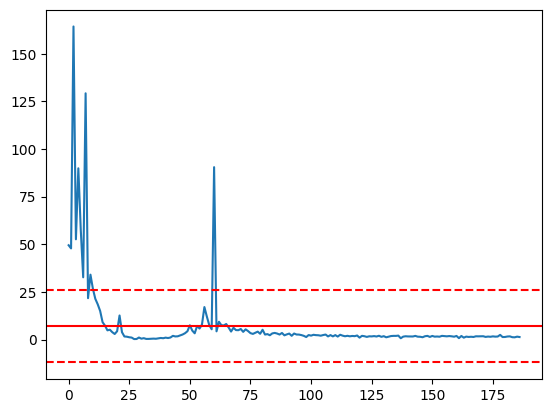

In [22]:
import matplotlib.pyplot as plt
plt.plot(ratio)
plt.axhline(ratio_mean, color="red")
plt.axhline(ratio_mean + ratio_std, color="red", linestyle="--")
plt.axhline(ratio_mean - ratio_std, color="red", linestyle="--")
plt.show()

In [23]:
import pandas as pd

接下来我们开始panadas的学习

读取

In [24]:
df = pd.read_excel("... .xlsx", index_col=0)
df = pd.read_csv("... .csv", index_col=0)
df = pd.read_json("... .json", index_col=0)
df = pd.read_csv("... .csv", index_col=0, sep=";") # 读取分号分隔的文件
df = pd.read_txt("... .txt", index_col=0)
df = pd.read_xlsx("... .xlsx", index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: '... .xlsx'

保存

In [25]:
df.to_excel("... .xlsx")
df.to_csv("... .csv")

NameError: name 'df' is not defined

In [26]:
import pandas as pd

l = [11,22,33]
s = pd.Series(l)
print("list:", l)
print("series:", s)

list: [11, 22, 33]
series: 0    11
1    22
2    33
dtype: int64


In [27]:
s = pd.Series(l, index=["a", "b", "c"])
s

a    11
b    22
c    33
dtype: int64

二维：dataframe

In [28]:
df = pd.DataFrame([
    [1,2],
    [3,4]
])
df

0  1
0  1  2
1  3  4

In [29]:
df = pd.DataFrame({"col1": [1,3], "col2": [2, 4]})
df
print(df["col1"], "\n")
print("取出来之后的 type：", type(df["col1"]))

0    1
1    3
Name: col1, dtype: int64 

取出来之后的 type： <class 'pandas.core.series.Series'>


In [30]:
df = pd.DataFrame({"col1": pd.Series([1,3]), "col2": pd.Series([2, 4])})
df

col1  col2
0     1     2
1     3     4

In [31]:
s = pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"])
df = pd.DataFrame({"col1": [1,3], "col2": [2, 4]}, index=["a", "b"])
print(s, "\n")
print(df)

a    1.0
b    2.0
c    3.0
dtype: float64 

   col1  col2
a     1     2
b     3     4


既然 DataFrame 的 Column 和 Index 这么有意思，十有八九，你会想取出来用一用这些 Column 和 Index，比如你数据比较大的时候，想初步看看这份数据涉及了多少特征， 数据的 index 有多少种的时候，你可以直接获取到这些信息。

In [32]:
print(df.index, "\n")
print(df.columns)

Index(['a', 'b'], dtype='object') 

Index(['col1', 'col2'], dtype='object')


In [33]:
df = pd.DataFrame({"col1": [1,3], "col2": [2, 4]}, index=["a", "b"])
df.to_numpy()

array([[1, 2],
       [3, 4]], dtype=int64)